# HR ANALYTICS for Classification
Dataset including HR Analytics from kaggle.

- ```satisfaction_level``` : overall employee satisfaction
- ```last_evaluation```: employee score on last evaluation
- ```number_project```: number of projects employee has
- ```average_monthly_hours```: average monthly hours an employee works
- ```time_spend_company```: how long employee has been with company in years
- ```Work_accident```: whether or not the employee has had an accident at work
- ```left```: whether or not the employee left the company
- ```promotion_last_5years```: whether or not the employee has had a promotion in the last 5 years
- ```sales```: business unit the employee works in 
- ```salary```: salary level of the employee, (low, medium, or high)

Categorical features (already encoded):
- **left**: target variable, binary feature, 1 if left, 0 if stayed
- **Work_accident**: binary feature, 1 if have had a work accident, 0 if no
- **promotion_last_5years**: binary feature, 1 if employee was promoted in last 5 years, 0 if no promotion

Categorical features (not encoded):
- **sales**: department of company employee works in
- **salary**: employee level of salary

Numerical features:
- **satisfaction_level**: employee satisfaction with their position
- **last_evaluation**: employee score on last evaluation
- **number_project**: number of projects of the employee
- **average_monthly_hours**: average monthly hours an employee works
- **time_spend_company**: how long employee has been in the company in years

## PLAN

- Check for missing values, handle them accordingly if needed
- Explore the data
- Scale numerical features for classification using multiple logistic regression
- Feature engineer:
    - Look into ```average_montly_hours```/```number_project``` to see average monthly hours per project
    - Look into ```satisfaction_level```*```last_evaluation``` to see interaction between these two features
- Target variable ```left``` and features ```promotion_last_5years``` & ```Work_accident``` are imbalanced, create baseline model with imbalances
- Apply SMOTE and compare performance of models
- Models used for classification:
    - **Multiple Logistic Regression**: A binary response (dependent variable) with multiple predictors (independent variables).
    - **Multiple Logistic Regression** with SMOTE: A binary response (dependent variable) with multiple predictors (independent variables).
- Evaluate and compare performance metrics for both models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\MJR0X3R\DataScienceProjects\imbalanced_project\notebooks


In [4]:
data = pd.read_csv('../data/raw/turnover.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>,
        <Axes: title={'center': 'number_project'}>],
       [<Axes: title={'center': 'average_montly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>, <Axes: >]],
      dtype=object)

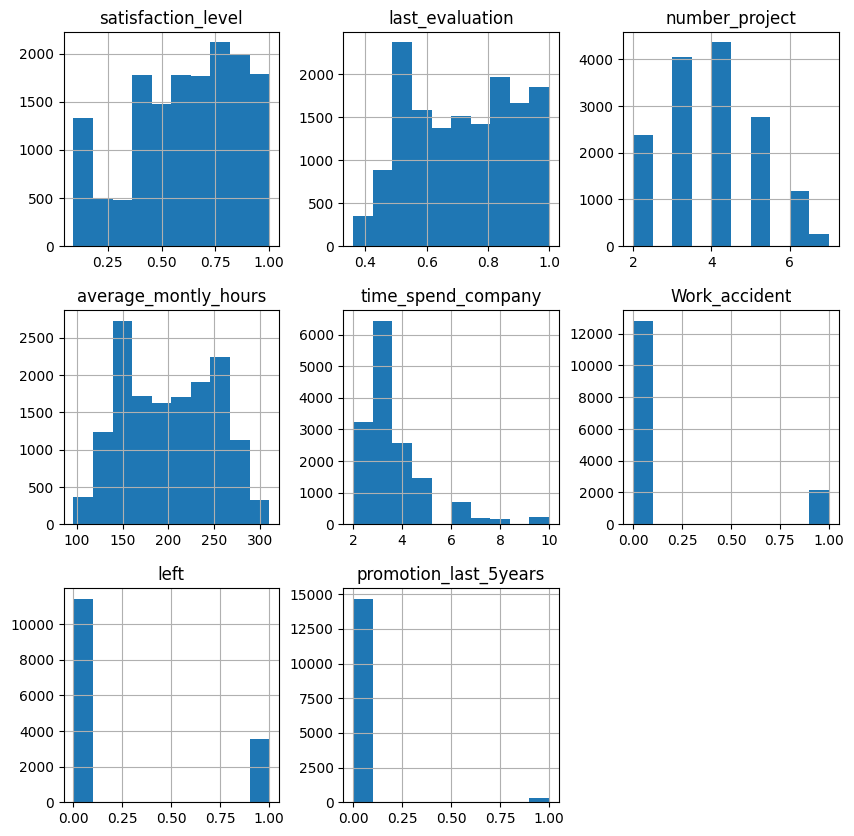

In [6]:
data.hist(figsize=(10,10))

MODERATELY TO HIGHLY IMBALANCED FEATURES:
- ```left```
- ```promotion_last_5years```
- ```Work_accident```


In [7]:
(data['promotion_last_5years'] == 0).sum()


np.int64(14680)

In [8]:
(data['promotion_last_5years'] == 1).sum()

np.int64(319)

### VISUALIZING NUMERICAL VARIABLES ACROSS CATEGORICAL VARIABLES

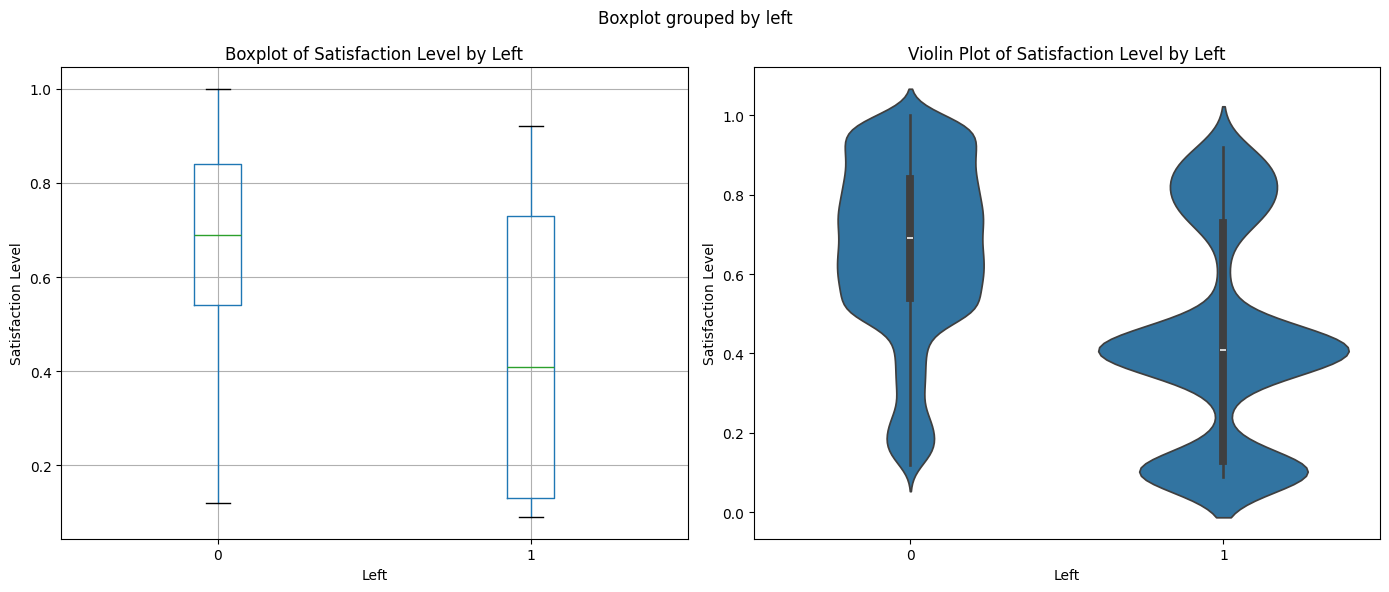

In [9]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot in first subplot
data.boxplot('satisfaction_level', 'left', ax=axes[0])
axes[0].set_title('Boxplot of Satisfaction Level by Left')
axes[0].set_ylabel('Satisfaction Level')
axes[0].set_xlabel('Left')

# Violin plot in second subplot
sns.violinplot(x='left', y='satisfaction_level', data=data, ax=axes[1])
axes[1].set_title('Violin Plot of Satisfaction Level by Left')
axes[1].set_ylabel('Satisfaction Level')
axes[1].set_xlabel('Left')

# Display the plots
plt.tight_layout()
plt.show()

Based on the above boxplot and violin plot, there is a more consistently concentrated region for higher satisfaction levels for employees who have not left the company. For employees who have left the company, the satisfaction level is lower overall and there is less conistency of a concentrated region for satisfaction level.

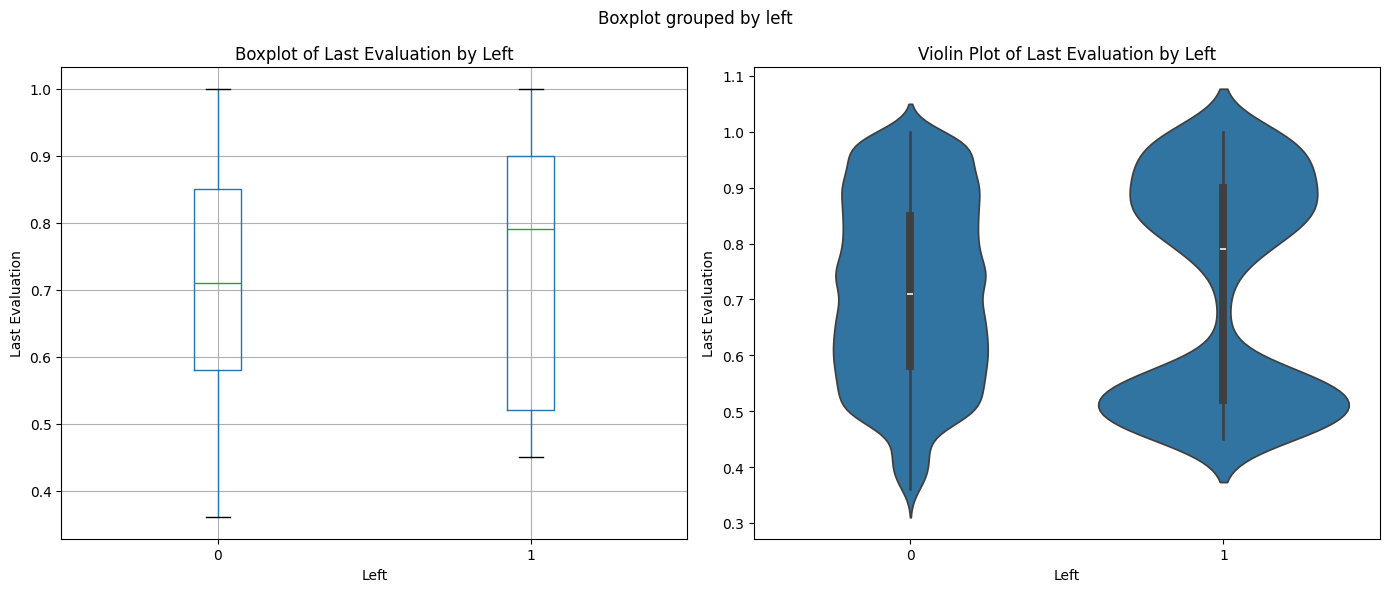

In [10]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot in first subplot
data.boxplot('last_evaluation', 'left', ax=axes[0])
axes[0].set_title('Boxplot of Last Evaluation by Left')
axes[0].set_ylabel('Last Evaluation')
axes[0].set_xlabel('Left')

# Violin plot in second subplot
sns.violinplot( x='left',y='last_evaluation', data=data, ax=axes[1])
axes[1].set_title('Violin Plot of Last Evaluation by Left')
axes[1].set_ylabel('Last Evaluation')
axes[1].set_xlabel('Left')

# Display the plots
plt.tight_layout()
plt.show()

Based off the above box plot and violin plot, employees who left did better overall on their last evaluation and there are more concentrated regions for high scores and low scores with not many in-between. Employees who did not leave have a more even distibution of scores on their last evaluation.

### VISUALIZING RELATIONSHIPS BETWEEN BINARY FEATURES

<Figure size 640x480 with 0 Axes>

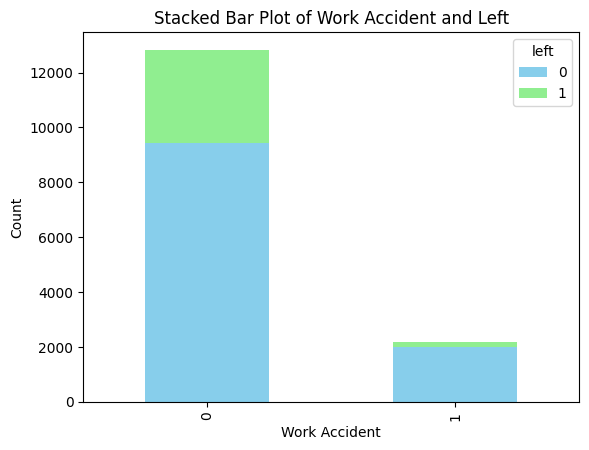

In [11]:
# Calculate counts
grouped = data.groupby(['Work_accident', 'left']).size().unstack()

# Plot stacked bar chart
plt.figure()
grouped.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])
plt.xlabel('Work Accident')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Work Accident and Left')
plt.show()


I expected to see work accidents associated with an employee leaving but that does not seem to be the case

<Figure size 640x480 with 0 Axes>

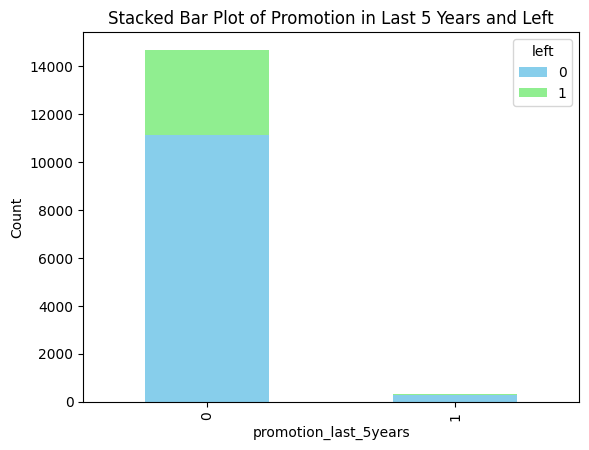

In [12]:
# Calculate counts
grouped = data.groupby(['promotion_last_5years', 'left']).size().unstack()

# Plot stacked bar chart
plt.figure()
grouped.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])
plt.xlabel('promotion_last_5years')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Promotion in Last 5 Years and Left')
plt.show()


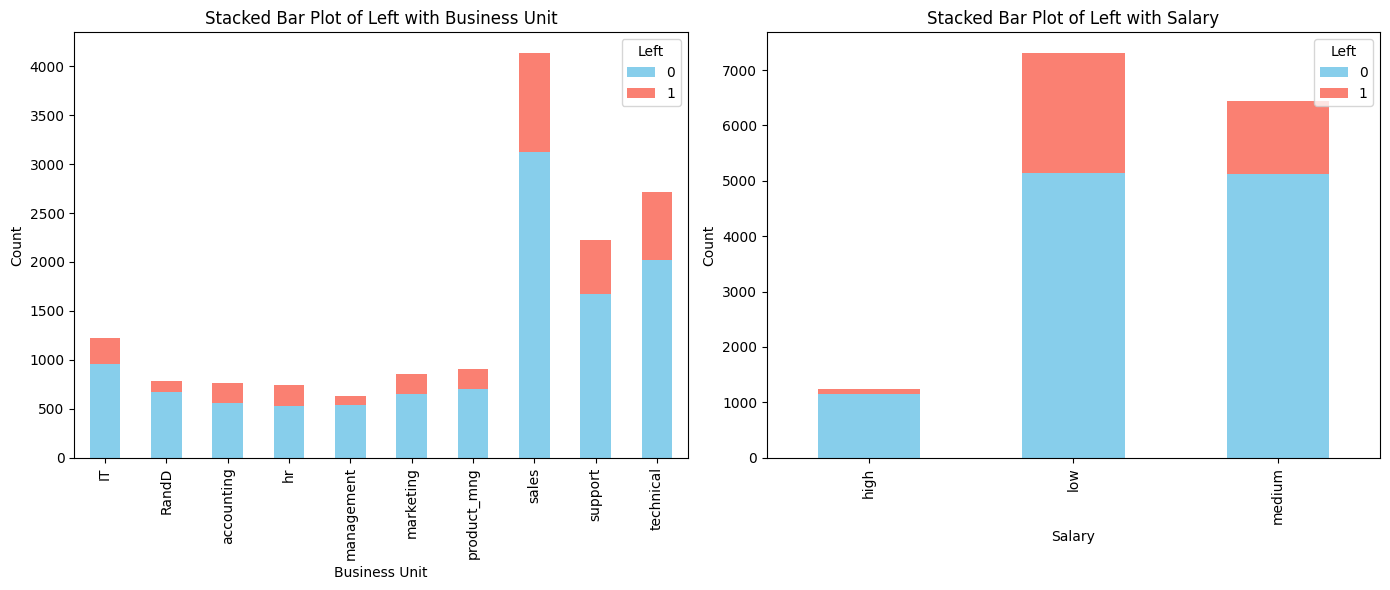

In [13]:
# Calculate counts
grouped = data.groupby(['sales', 'left']).size().unstack().fillna(0)
grouped2 = data.groupby(['salary', 'left']).size().unstack().fillna(0)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First stacked bar plot
grouped.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[0])
axes[0].set_title('Stacked Bar Plot of Left with Business Unit')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Business Unit')
axes[0].legend(title='Left', loc='upper right')

# Second stacked bar plot
grouped2.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_title('Stacked Bar Plot of Left with Salary')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Salary')
axes[1].legend(title='Left', loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()




### NUMERICAL CORRELATIONS

In [14]:
corr_matrix = data.corr(numeric_only=True)

[Text(0.5, 0, 'satisfaction_level'),
 Text(1.5, 0, 'last_evaluation'),
 Text(2.5, 0, 'number_project'),
 Text(3.5, 0, 'average_montly_hours'),
 Text(4.5, 0, 'time_spend_company'),
 Text(5.5, 0, 'Work_accident'),
 Text(6.5, 0, 'left'),
 Text(7.5, 0, 'promotion_last_5years')]

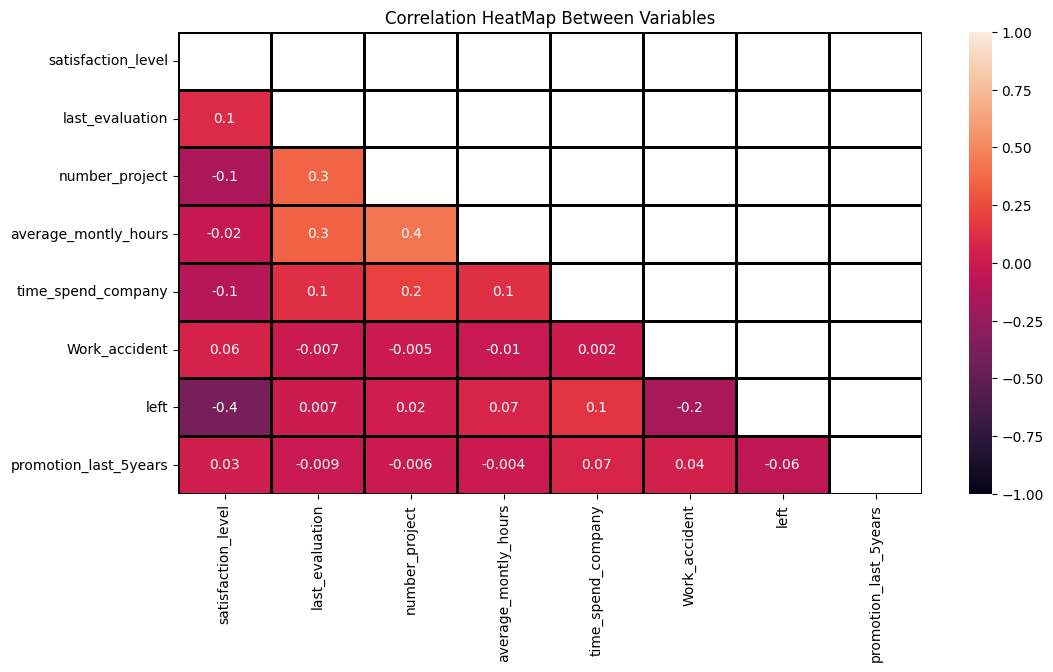

In [15]:
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12,6))
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='0.1g', vmin= -1, vmax= 1, center= 0, cmap= 'rocket', linewidths= 1, linecolor= 'black')
heatmap.set_title('Correlation HeatMap Between Variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

The most important correlations coming from this matrix are:
- ```number_project``` and ```last_evaluation``` are positively correlated by 0.3
- ```average_monthly_hours``` and ```last_evaluation``` are positively correlated by 0.3
- ```average_monthly_hours``` and ```number_project``` are positively correlated by 0.4
- ```left``` and ```satisfaction_level``` are negatively correlated by -0.4

### CATEGORY DISTRIBUTION IN CATEGORICAL FEATURES

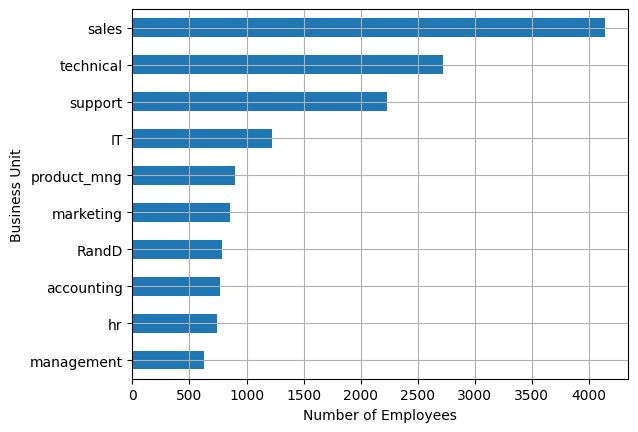

In [16]:
plt.figure()
data["sales"].value_counts().sort_values().plot.barh(rot=0, grid=True)
plt.ylabel("Business Unit")
plt.xlabel("Number of Employees")
plt.show()

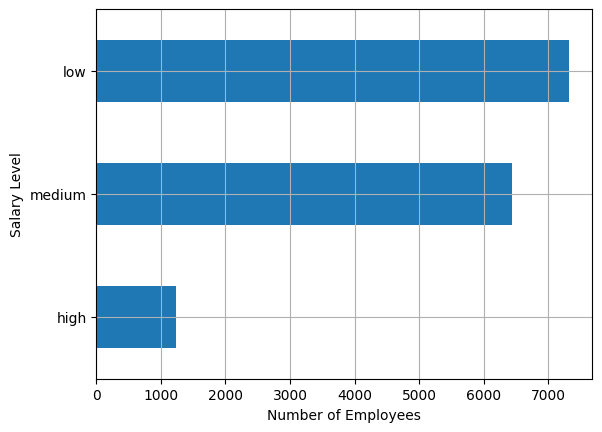

In [17]:
plt.figure()
data["salary"].value_counts().sort_values().plot.barh(rot=0, grid=True)
plt.ylabel("Salary Level")
plt.xlabel("Number of Employees")
plt.show()

### FEATURE ENGINEERING

In [18]:
def feature_engineering(data):
    data["monthly_hrs_per_proj"] = data["average_montly_hours"] / data["number_project"]
    data["satis_eval_interaction"] = data["satisfaction_level"] * data["last_evaluation"]
    return data

In [19]:
feature_engineered = feature_engineering(data)
feature_engineered

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,monthly_hrs_per_proj,satis_eval_interaction
0,0.38,0.53,2,157,3,0,1,0,sales,low,78.500000,0.2014
1,0.80,0.86,5,262,6,0,1,0,sales,medium,52.400000,0.6880
2,0.11,0.88,7,272,4,0,1,0,sales,medium,38.857143,0.0968
3,0.72,0.87,5,223,5,0,1,0,sales,low,44.600000,0.6264
4,0.37,0.52,2,159,3,0,1,0,sales,low,79.500000,0.1924
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,75.500000,0.2280
14995,0.37,0.48,2,160,3,0,1,0,support,low,80.000000,0.1776
14996,0.37,0.53,2,143,3,0,1,0,support,low,71.500000,0.1961
14997,0.11,0.96,6,280,4,0,1,0,support,low,46.666667,0.1056


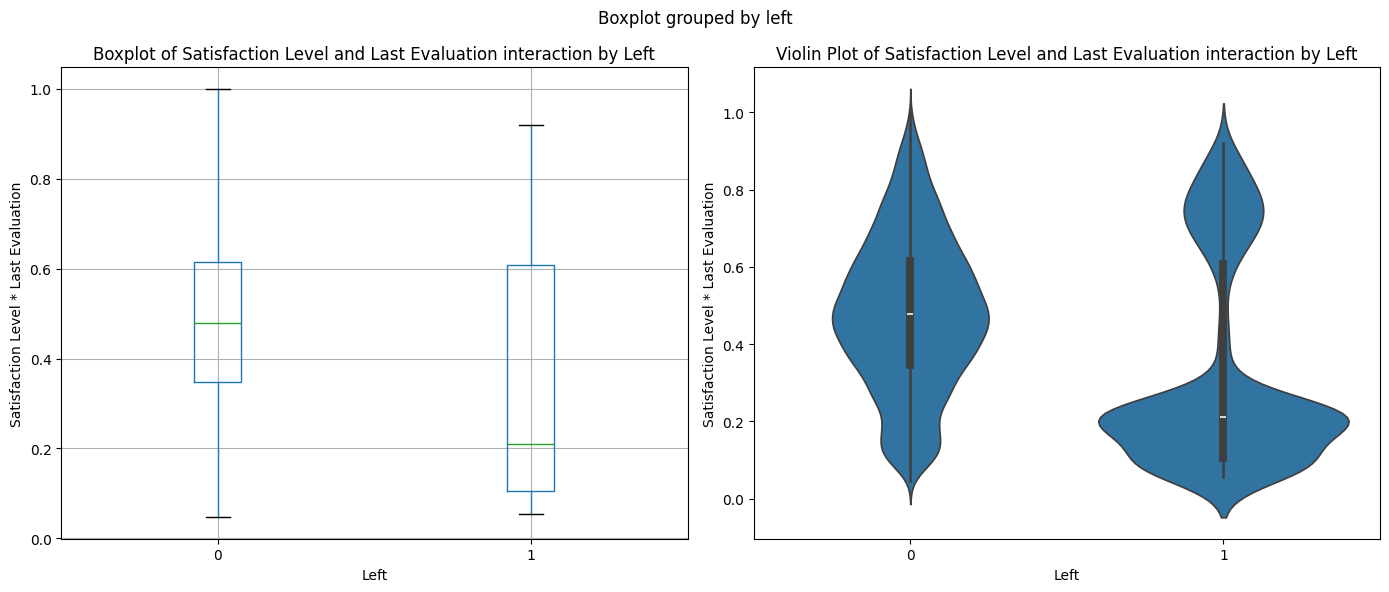

In [20]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot in first subplot
data.boxplot('satis_eval_interaction', 'left', ax=axes[0])
axes[0].set_title('Boxplot of Satisfaction Level and Last Evaluation interaction by Left')
axes[0].set_ylabel('Satisfaction Level * Last Evaluation')
axes[0].set_xlabel('Left')

# Violin plot in second subplot
sns.violinplot(x='left', y='satis_eval_interaction', data=data, ax=axes[1])
axes[1].set_title('Violin Plot of Satisfaction Level and Last Evaluation interaction by Left')
axes[1].set_ylabel('Satisfaction Level * Last Evaluation')
axes[1].set_xlabel('Left')

# Display the plots
plt.tight_layout()
plt.show()

Using the new engineered feature capturing the interaction between ```satisfaction_level``` and ```last_evaluation```, this result is very similar to ```last_evaluation``` boxplot grouped by ```left```.

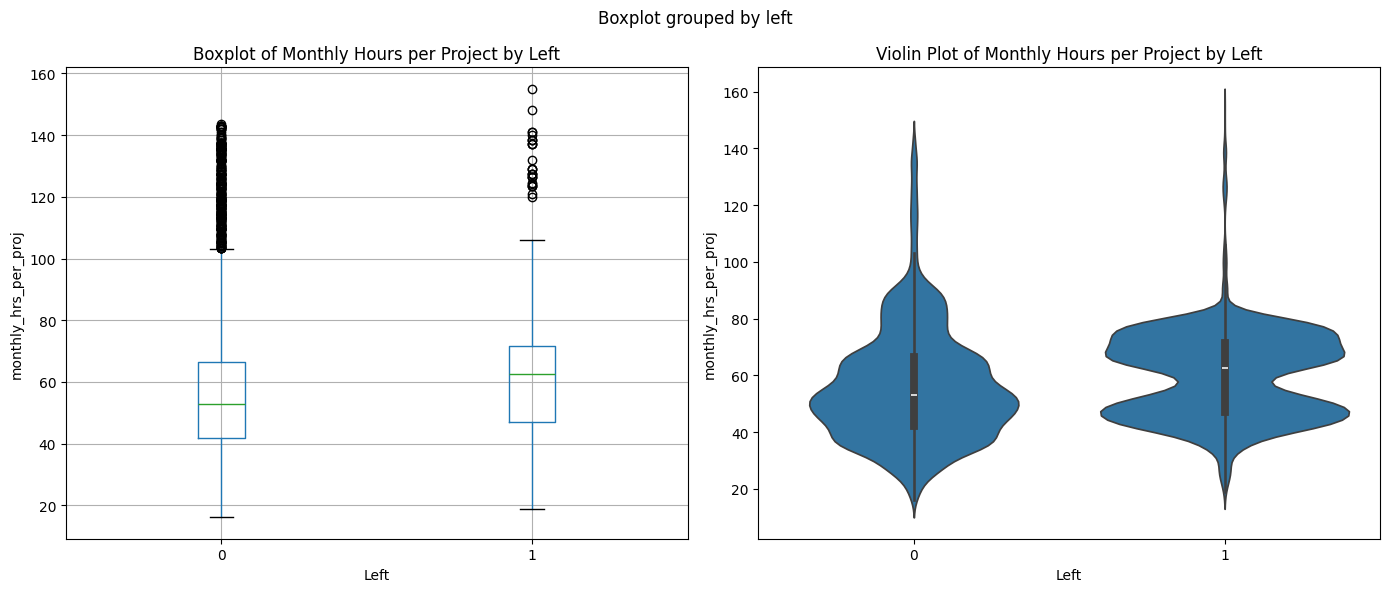

In [21]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot in first subplot
data.boxplot('monthly_hrs_per_proj', 'left', ax=axes[0])
axes[0].set_title('Boxplot of Monthly Hours per Project by Left')
axes[0].set_ylabel('monthly_hrs_per_proj')
axes[0].set_xlabel('Left')

# Violin plot in second subplot
sns.violinplot(x='left', y='monthly_hrs_per_proj', data=data, ax=axes[1])
axes[1].set_title('Violin Plot of Monthly Hours per Project by Left')
axes[1].set_ylabel('monthly_hrs_per_proj')
axes[1].set_xlabel('Left')

# Display the plots
plt.tight_layout()
plt.show()

Using the new engineered feature capturing the ```monthly_hrs_per_proj```, this result is not particularly ground breaking.

In [22]:
corr_matrix_feat_eng = feature_engineered.corr(numeric_only=True)

[Text(0.5, 0, 'satisfaction_level'),
 Text(1.5, 0, 'last_evaluation'),
 Text(2.5, 0, 'number_project'),
 Text(3.5, 0, 'average_montly_hours'),
 Text(4.5, 0, 'time_spend_company'),
 Text(5.5, 0, 'Work_accident'),
 Text(6.5, 0, 'left'),
 Text(7.5, 0, 'promotion_last_5years'),
 Text(8.5, 0, 'monthly_hrs_per_proj'),
 Text(9.5, 0, 'satis_eval_interaction')]

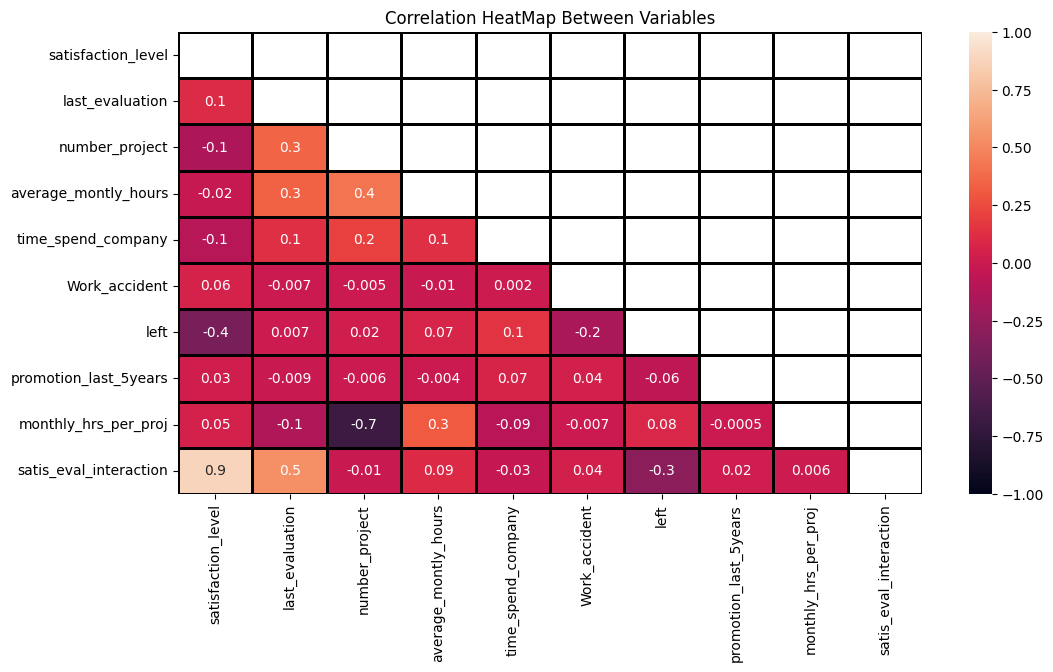

In [25]:
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_feat_eng, dtype=bool))

plt.figure(figsize=(12,6))
heatmap = sns.heatmap(corr_matrix_feat_eng, mask=mask, annot=True, fmt='0.1g', vmin= -1, vmax= 1, center= 0, cmap= 'rocket', linewidths= 1, linecolor= 'black')
heatmap.set_title('Correlation HeatMap Between Variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

The most important correlations coming from this matrix other than between the engineered features and those associated with are:
- ```number_project``` and ```last_evaluation``` are positively correlated by 0.3
- ```average_monthly_hours``` and ```last_evaluation``` are positively correlated by 0.3
- ```average_monthly_hours``` and ```number_project``` are positively correlated by 0.4
- ```left``` and ```satisfaction_level``` are negatively correlated by -0.4

NEW CORRELATION
- ```left``` and ```satis_eval_interaction``` are negatively correlated by -0.3

### ENCODING CATEGORICAL VARIABLES

I will use OneHotEncoding to encode the features ```sales``` and ```salary```.

In [33]:
from sklearn.preprocessing import OneHotEncoder

# Specify the columns that need to be one-hot encoded
categorical_features = data.select_dtypes(exclude=np.number).columns
data_categotical = data.select_dtypes(exclude=np.number)

cat_encoder = OneHotEncoder(sparse_output=False)
cat_onehot = cat_encoder.fit_transform(data_categotical)

print(categorical_features)
print(cat_onehot.shape)

Index(['sales', 'salary'], dtype='object')
(14999, 13)


### SCALING NUMERICAL FEATURES

In [34]:
from sklearn.preprocessing import StandardScaler

data_numerical = feature_engineered.select_dtypes(include=np.number)

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_numerical)
data_scaled

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.14741182,
         1.12542941, -1.07487263],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.14741182,
        -0.24594074,  1.08713257],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.14741182,
        -0.95752196, -1.53961933],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.14741182,
         0.75762899, -1.09842098],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.14741182,
        -0.5471868 , -1.50052018],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.14741182,
         1.15170087, -1.1148604 ]])